# Part 1 - MNIST Classification using SVM & Random Forest

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
np.random.seed(42)

## Data Loading
Load the train and test csv's into pandas dataframes

In [2]:
path= "C:/Users/chlpp/OneDrive - McGill University/Desktop/ECSE 415/Assignment3/ECSE-415-assignment3F22/data/"
train_pd =pd.read_csv(path+'train.csv')  
test_pd = pd.read_csv(path+'test.csv')
X_train_np = train_pd.drop(['7'],axis=1).to_numpy()
Y_train_np = train_pd['7'].to_numpy()
X_test_np = test_pd.drop(['7'],axis=1).to_numpy()
Y_test_np = test_pd['7'].to_numpy()

In [3]:
train_pd.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.670,0.671,0.672,0.673,0.674,0.675,0.676,0.677,0.678,7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [4]:
test_pd.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667,7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Split the train data to train and validation

Split the train data to train and validation: 80% and 20% respectively. **Fix the random seed to 42** to make sure the split is always the same for different runs

In [5]:
from sklearn.model_selection import train_test_split
X_train_np_80, X_vali_np_20, y_train_np_80, y_vali_np_20 = \
    train_test_split(X_train_np, Y_train_np, test_size=0.2, random_state=42)

## Classifiers 
For this assignment, you will explore the performance of two different classifiers on the task of digits classification. 

*   *Support Vector Machines (SVM)*
*   *Random Forest (RF)*

## Evaluation Metrics 
Report following two metrics to evaluate the performance of classifiers. 
*   Accuracy: The number of correct predictions divided by the total predictions.
*   Confusion Matrix: A visual representation of misclassification. A 2D histogram of true vs. predicted labels.






## Support Vector Machines (SVM)

1.   **Linear SVM** - 
Train using a linear SVM,  
Use [SVC from Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC) **sklearn.svm.SVC(kernel=’linear’)**  Keeping all the hyperparameters default. Report Accuracy and Confusion Matrix of the linear SVM


2.   **NonLinear SVMs** - 
Train **two different** SVM classifiers with **two different** kernels: 
*   **Polynomial**
*   **Radial Basis Function (RBF)**

Use [SVC from Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC) and change kernel keeping other hyperparameters as default.


### 1.   **Linear SVM**  

Accuracy of the linear SVM = 0.91

Confusion Matrix of the linear SVM

                 Predicted Negative  Predicted Positive
Actual Negative               35627                 373
Actual Positive                 373                3627


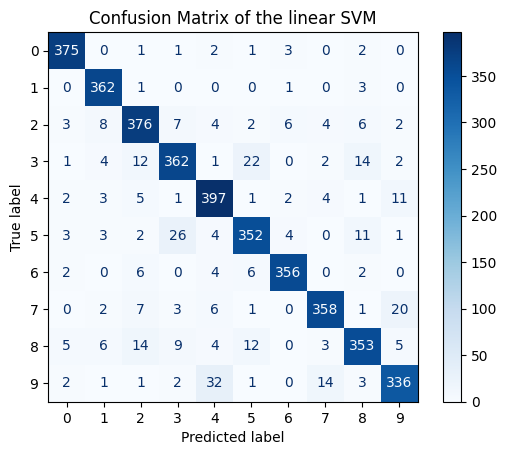

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = SVC(kernel='linear')
model.fit(X=X_train_np_80,y=y_train_np_80)
y_pred = model.predict(X=X_vali_np_20)
test_accuracy = np.sum(y_pred == y_vali_np_20)/len(y_vali_np_20)
cm = multilabel_confusion_matrix(y_vali_np_20, y_pred)
cm_tmp = np.zeros_like(cm[0])
for k in range(len(cm)):
    cm_tmp[0][0] += cm[k][0][0]
    cm_tmp[0][1] += cm[k][0][1]
    cm_tmp[1][0] += cm[k][1][0]
    cm_tmp[1][1] += cm[k][1][1]
cm_linear = cm_tmp
cm_linear = pd.DataFrame(cm_linear, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(f'Accuracy of the linear SVM = {test_accuracy:.2f}\n')

print('Confusion Matrix of the linear SVM\n')
print(cm_linear)
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    X_vali_np_20,
    y_vali_np_20,
    # display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title('Confusion Matrix of the linear SVM')
plt.show()


Accuracy of the non linear SVM with polynomial kernel = 0.97

Confusion Matrix of the non linear SVM with polynomial kernel

                 Predicted Negative  Predicted Positive
Actual Negative               35871                 129
Actual Positive                 129                3871


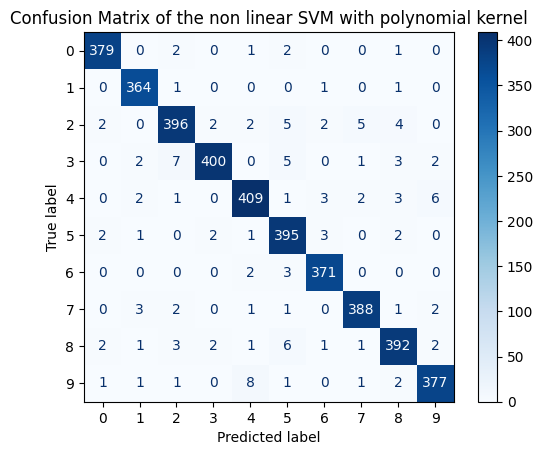

In [7]:
model_polynomial = SVC(kernel='poly')
model_polynomial.fit(X=X_train_np_80,y=y_train_np_80)
y_pred = model_polynomial.predict(X=X_vali_np_20)
test_accuracy = np.sum(y_pred == y_vali_np_20)/len(y_vali_np_20)
cm = multilabel_confusion_matrix(y_vali_np_20, y_pred)
cm_tmp = np.zeros_like(cm[0])
for k in range(len(cm)):
    cm_tmp[0][0] += cm[k][0][0]
    cm_tmp[0][1] += cm[k][0][1]
    cm_tmp[1][0] += cm[k][1][0]
    cm_tmp[1][1] += cm[k][1][1]
cm_poly = cm_tmp
cm_poly = pd.DataFrame(cm_poly, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(f'Accuracy of the non linear SVM with polynomial kernel = {test_accuracy:.2f}\n')
print('Confusion Matrix of the non linear SVM with polynomial kernel\n')
print(cm_poly)

disp = ConfusionMatrixDisplay.from_estimator(
    model_polynomial,
    X_vali_np_20,
    y_vali_np_20,
    # display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title('Confusion Matrix of the non linear SVM with polynomial kernel')
plt.show()

Accuracy of the non linear SVM with rbf kernel = 0.97

Confusion Matrix of the non linear SVM with rbf kernel

                 Predicted Negative  Predicted Positive
Actual Negative               35887                 113
Actual Positive                 113                3887


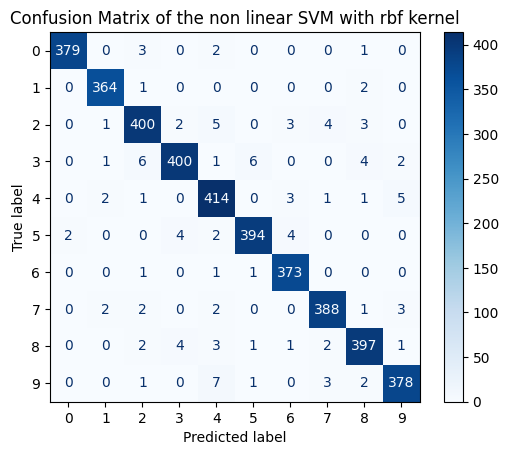

In [8]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X=X_train_np_80,y=y_train_np_80)
y_pred = model_rbf.predict(X=X_vali_np_20)
test_accuracy_rbf = np.sum(y_pred == y_vali_np_20)/len(y_vali_np_20)
cm = multilabel_confusion_matrix(y_vali_np_20, y_pred)
cm_tmp = np.zeros_like(cm[0])
for k in range(len(cm)):
    cm_tmp[0][0] += cm[k][0][0]
    cm_tmp[0][1] += cm[k][0][1]
    cm_tmp[1][0] += cm[k][1][0]
    cm_tmp[1][1] += cm[k][1][1]
cm_rbf = cm_tmp
cm_rbf = pd.DataFrame(cm_rbf, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(f'Accuracy of the non linear SVM with rbf kernel = {test_accuracy_rbf:.2f}\n')
print('Confusion Matrix of the non linear SVM with rbf kernel\n')
print(cm_rbf)

disp_rbf = ConfusionMatrixDisplay.from_estimator(
    model_rbf,
    X_vali_np_20,
    y_vali_np_20,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp_rbf.ax_.set_title('Confusion Matrix of the non linear SVM with rbf kernel')
plt.show()

***Non-linear SVM with rbf is giving the best result. Since the given datasets are in high demention and labelled into multiple categories, I expected the two non-linear SVMs would give the better results***

## Random Forest Classifiers 


1.   Train a **Random Forest classifier** of scikit-learn with following parameters: n estimators=100, criterion = ’entropy’. Keep all other parameters to default. Report the performance of the classifier.

2.   Train RF classifiers with different numbers of trees (try at least 3 experiments with trees = 40, 200, 250). Write your observations. Do you see an increase in classification performance with an increase in the number of trees? Report the number of trees for which RF gives the best performance.



Accuracy of the RFC (with trees =100) = 0.96

Confusion Matrix of the RFC (with trees =100)

                 Predicted Negative  Predicted Positive
Actual Negative               35845                 155
Actual Positive                 155                3845


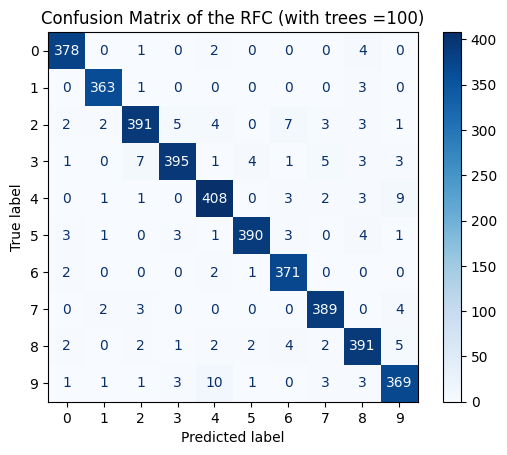

In [9]:
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier(n_estimators=100, criterion='entropy')
RFC_model.fit(X=X_train_np_80,y=y_train_np_80)
y_pred = RFC_model.predict(X=X_vali_np_20)
test_accuracy_RFC_100 = np.sum(y_pred == y_vali_np_20)/len(y_vali_np_20)

cm = multilabel_confusion_matrix(y_vali_np_20, y_pred)
cm_tmp = np.zeros_like(cm[0])
for k in range(len(cm)):
    cm_tmp[0][0] += cm[k][0][0]
    cm_tmp[0][1] += cm[k][0][1]
    cm_tmp[1][0] += cm[k][1][0]
    cm_tmp[1][1] += cm[k][1][1]
cm_RFC_100 = cm_tmp
cm_RFC_100 = pd.DataFrame(cm_RFC_100, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(f'Accuracy of the RFC (with trees =100) = {test_accuracy_RFC_100:.2f}\n')
print('Confusion Matrix of the RFC (with trees =100)\n')
print(cm_RFC_100)

disp_RFC_100 = ConfusionMatrixDisplay.from_estimator(
    RFC_model,
    X_vali_np_20,
    y_vali_np_20,
    cmap=plt.cm.Blues,
    normalize=None
)
disp_RFC_100.ax_.set_title('Confusion Matrix of the RFC (with trees =100)')
plt.show()


Accuracy of the RFC (with trees =40) = 0.96

Confusion Matrix of the RFC(with trees =40)

                 Predicted Negative  Predicted Positive
Actual Negative               35822                 178
Actual Positive                 178                3822


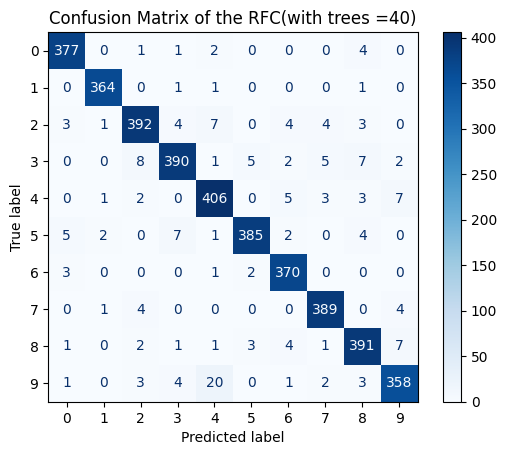

In [10]:
RFC_model_40 = RandomForestClassifier(n_estimators=40, criterion='entropy')
RFC_model_40.fit(X=X_train_np_80,y=y_train_np_80)
y_pred = RFC_model_40.predict(X=X_vali_np_20)
test_accuracy_RFC_40 = np.sum(y_pred == y_vali_np_20)/len(y_vali_np_20)

cm = multilabel_confusion_matrix(y_vali_np_20, y_pred)
cm_tmp = np.zeros_like(cm[0])
for k in range(len(cm)):
    cm_tmp[0][0] += cm[k][0][0]
    cm_tmp[0][1] += cm[k][0][1]
    cm_tmp[1][0] += cm[k][1][0]
    cm_tmp[1][1] += cm[k][1][1]
cm_RFC_40 = cm_tmp
cm_RFC_40 = pd.DataFrame(cm_RFC_40, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(f'Accuracy of the RFC (with trees =40) = {test_accuracy_RFC_40:.2f}\n')
print('Confusion Matrix of the RFC(with trees =40)\n')
print(cm_RFC_40)

disp_RFC_40 = ConfusionMatrixDisplay.from_estimator(
    RFC_model_40,
    X_vali_np_20,
    y_vali_np_20,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp_RFC_40.ax_.set_title('Confusion Matrix of the RFC(with trees =40)')
plt.show()


Accuracy of the RFC (with trees =200) = 0.96

Confusion Matrix of the RFC(with trees =200)

                 Predicted Negative  Predicted Positive
Actual Negative               35858                 142
Actual Positive                 142                3858


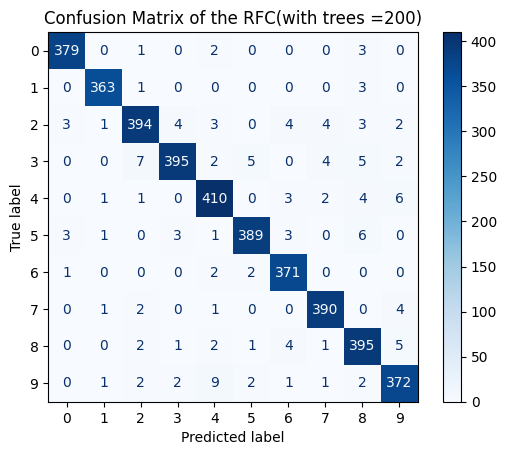

In [11]:
RFC_model_200 = RandomForestClassifier(n_estimators=200, criterion='entropy')
RFC_model_200.fit(X=X_train_np_80,y=y_train_np_80)
y_pred = RFC_model_200.predict(X=X_vali_np_20)
test_accuracy_RFC_200 = np.sum(y_pred == y_vali_np_20)/len(y_vali_np_20)

cm = multilabel_confusion_matrix(y_vali_np_20, y_pred)
cm_tmp = np.zeros_like(cm[0])
for k in range(len(cm)):
    cm_tmp[0][0] += cm[k][0][0]
    cm_tmp[0][1] += cm[k][0][1]
    cm_tmp[1][0] += cm[k][1][0]
    cm_tmp[1][1] += cm[k][1][1]
cm_RFC_200 = cm_tmp
cm_RFC_200 = pd.DataFrame(cm_RFC_200, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(f'Accuracy of the RFC (with trees =200) = {test_accuracy_RFC_200:.2f}\n')
print('Confusion Matrix of the RFC(with trees =200)\n')
print(cm_RFC_200)

disp_RFC_200 = ConfusionMatrixDisplay.from_estimator(
    RFC_model_200,
    X_vali_np_20,
    y_vali_np_20,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp_RFC_200.ax_.set_title('Confusion Matrix of the RFC(with trees =200)')
plt.show()


Accuracy of the RFC (with trees =250) = 0.96

Confusion Matrix of the RFC(with trees =250)

                 Predicted Negative  Predicted Positive
Actual Negative               35853                 147
Actual Positive                 147                3853


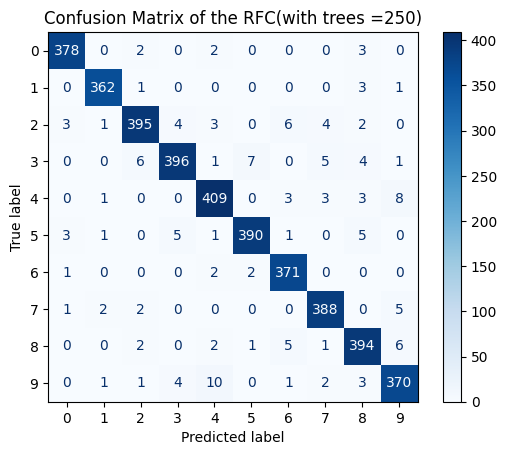

In [12]:
RFC_model_250 = RandomForestClassifier(n_estimators=250, criterion='entropy')
RFC_model_250.fit(X=X_train_np_80,y=y_train_np_80)
y_pred = RFC_model_250.predict(X=X_vali_np_20)
test_accuracy_RFC_250 = np.sum(y_pred == y_vali_np_20)/len(y_vali_np_20)

cm = multilabel_confusion_matrix(y_vali_np_20, y_pred)
cm_tmp = np.zeros_like(cm[0])
for k in range(len(cm)):
    cm_tmp[0][0] += cm[k][0][0]
    cm_tmp[0][1] += cm[k][0][1]
    cm_tmp[1][0] += cm[k][1][0]
    cm_tmp[1][1] += cm[k][1][1]
cm_RFC_250 = cm_tmp
cm_RFC_250 = pd.DataFrame(cm_RFC_250, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(f'Accuracy of the RFC (with trees =250) = {test_accuracy_RFC_250:.2f}\n')
print('Confusion Matrix of the RFC(with trees =250)\n')
print(cm_RFC_250)

disp_RFC_250 = ConfusionMatrixDisplay.from_estimator(
    RFC_model_250,
    X_vali_np_20,
    y_vali_np_20,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp_RFC_250.ax_.set_title('Confusion Matrix of the RFC(with trees =250)')
plt.show()


Generally, I can see an increase in classification perfermance with an increase in the number of trees but the RF with 200 trees peforms better than the RF with 250 trees.

The RF with 200 trees gives the best performance. 

## Comparison of Classifiers 



1.   **Performance Analysis**

  Compare the best performing RF classifier (number of trees) and SVM (type of kernel) from the previous sections. 


The best performing RF classifier

Accuracy of the RFC (with trees =250) = 0.96

Confusion Matrix of the RFC(with trees =250)

                 Predicted Negative  Predicted Positive
Actual Negative               35853                 147
Actual Positive                 147                3853


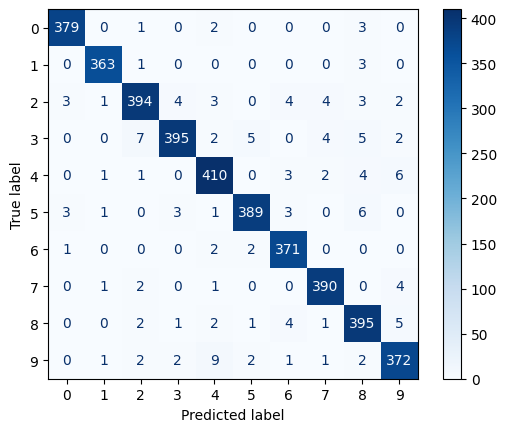

In [13]:
print(f'Accuracy of the RFC (with trees =250) = {test_accuracy_RFC_200:.2f}\n')
print('Confusion Matrix of the RFC(with trees =250)\n')
print(cm_RFC_250)
disp_RFC_200 = ConfusionMatrixDisplay.from_estimator(
    RFC_model_200,
    X_vali_np_20,
    y_vali_np_20,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp_RFC_250.ax_.set_title('Confusion Matrix of the RFC(with trees =250)')
plt.show()

The best performing SVM

Accuracy of the non linear SVM with rbf kernel = 0.97

Confusion Matrix of the non linear SVM with rbf kernel

                 Predicted Negative  Predicted Positive
Actual Negative               35887                 113
Actual Positive                 113                3887


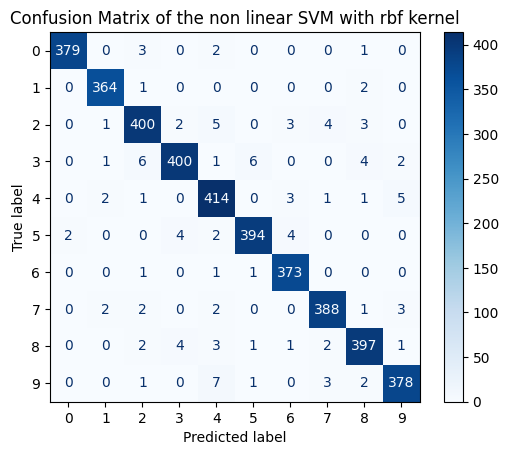

In [14]:
print(f'Accuracy of the non linear SVM with rbf kernel = {test_accuracy_rbf:.2f}\n')
print('Confusion Matrix of the non linear SVM with rbf kernel\n')
print(cm_rbf)
disp_rbf = ConfusionMatrixDisplay.from_estimator(
    model_rbf,
    X_vali_np_20,
    y_vali_np_20,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp_rbf.ax_.set_title('Confusion Matrix of the non linear SVM with rbf kernel')
plt.show()

The SVM performs better than the RFC


2.   **Test Performance**

Accuracy of the non linear SVM with rbf kernel = 0.97

Confusion Matrix of the non linear SVM with rbf kernel

                 Predicted Negative  Predicted Positive
Actual Negative               89677                 314
Actual Positive                 314                9685


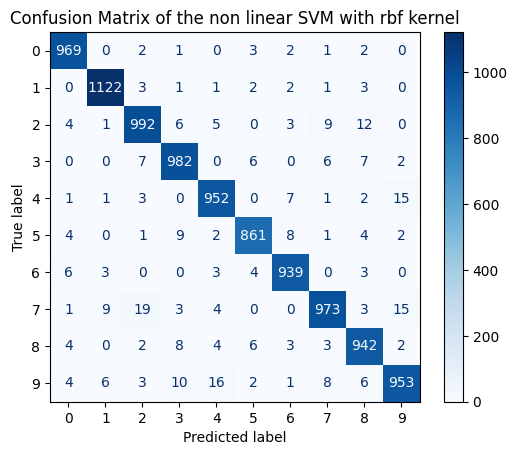

In [15]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X=X_train_np,y=Y_train_np)
y_pred = model_rbf.predict(X=X_test_np)
test_accuracy_rbf = np.sum(y_pred == Y_test_np)/len(Y_test_np)
cm = multilabel_confusion_matrix(Y_test_np, y_pred)
cm_tmp = np.zeros_like(cm[0])
for k in range(len(cm)):
    cm_tmp[0][0] += cm[k][0][0]
    cm_tmp[0][1] += cm[k][0][1]
    cm_tmp[1][0] += cm[k][1][0]
    cm_tmp[1][1] += cm[k][1][1]
cm_rbf = cm_tmp
cm_rbf = pd.DataFrame(cm_rbf, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(f'Accuracy of the non linear SVM with rbf kernel = {test_accuracy_rbf:.2f}\n')
print('Confusion Matrix of the non linear SVM with rbf kernel\n')
print(cm_rbf)

disp_rbf = ConfusionMatrixDisplay.from_estimator(
    model_rbf,
    X_test_np,
    Y_test_np,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp_rbf.ax_.set_title('Confusion Matrix of the non linear SVM with rbf kernel')
plt.show()

Accuracy of the RFC (with trees =200) = 0.96

Confusion Matrix of the RFC(with trees =200)

                 Predicted Negative  Predicted Positive
Actual Negative               89608                 383
Actual Positive                 383                9616


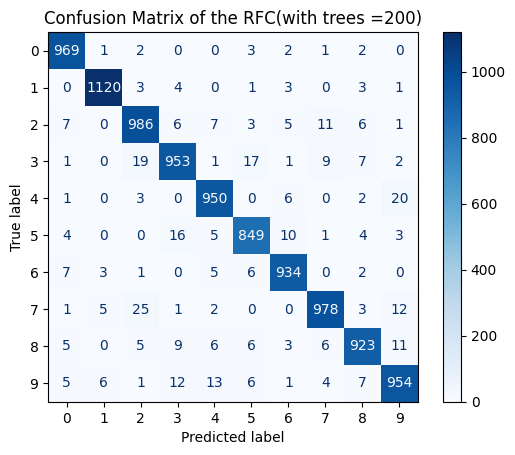

In [16]:
RFC_model_200 = RandomForestClassifier(n_estimators=200, criterion='entropy')
RFC_model_200.fit(X=X_train_np,y=Y_train_np)
y_pred = RFC_model_200.predict(X=X_test_np)
test_accuracy_RFC_200 = np.sum(y_pred == Y_test_np)/len(Y_test_np)

cm = multilabel_confusion_matrix(Y_test_np, y_pred)
cm_tmp = np.zeros_like(cm[0])
for k in range(len(cm)):
    cm_tmp[0][0] += cm[k][0][0]
    cm_tmp[0][1] += cm[k][0][1]
    cm_tmp[1][0] += cm[k][1][0]
    cm_tmp[1][1] += cm[k][1][1]
cm_RFC_200 = cm_tmp
cm_RFC_200 = pd.DataFrame(cm_RFC_200, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(f'Accuracy of the RFC (with trees =200) = {test_accuracy_RFC_200:.2f}\n')
print('Confusion Matrix of the RFC(with trees =200)\n')
print(cm_RFC_200)

disp_RFC_200 = ConfusionMatrixDisplay.from_estimator(
    RFC_model_200,
    X_test_np,
    Y_test_np,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp_RFC_200.ax_.set_title('Confusion Matrix of the RFC(with trees =200)')
plt.show()


# Part - 2 YOLO Object Detection on Montreal Street Scene




1.   **Yolo Object Detection (8 Points)**
  
  You can follow the commands from YOLO DarkNet [YOLO: Real-Time Object Detection pjreddie.com](https://pjreddie.com/darknet/yolo/) and use pre-trained YOLOV3 weights on the captured image to detect different objects like vehicles and people. Display the original image and image with predictions in the notebook.





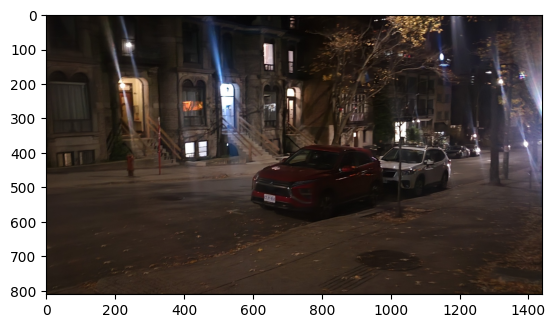

In [17]:
import cv2
import matplotlib.pyplot as plt
import time

pic = 'street.jpg'
street_image = cv2.imread(path + pic) #numpy arrays that contains BGR values of pixels 
street_image_rgb = cv2.cvtColor(street_image, cv2.COLOR_BGR2RGB) #convert BGR to RGB  
plt.imshow(street_image_rgb)

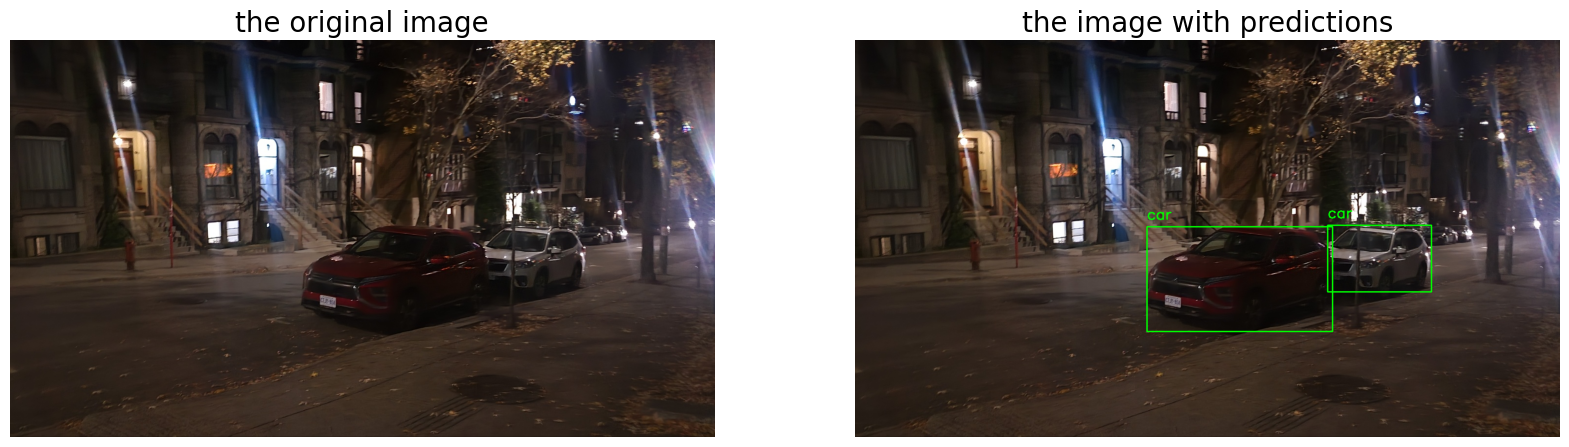

In [18]:
street_image = cv2.imread(path + pic) #numpy arrays that contains BGR values of pixels 

LABELS = open(path+"coco.names").read().strip().split("\n")
weightsPath = (path+"yolov3.weights")
configPath = ( path+"yolov3.cfg")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)
(H, W) = street_image.shape[:2]
ln = net.getLayerNames()
net.getUnconnectedOutLayers()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
blob = cv2.dnn.blobFromImage(street_image, 1 / 255.0, (416, 416),
	swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()
boxes = []
confidences = []
classIDs = []
for output in layerOutputs:
	for detection in output:
		scores = detection[5:]
		classID = np.argmax(scores)
		confidence = scores[classID]
		if confidence > 0.98:

			box = detection[0:4] * np.array([W, H, W, H])
			(centerX, centerY, width, height) = box.astype("int")
			x = int(centerX - (width / 2))
			y = int(centerY - (height / 2))
			boxes.append([x, y, int(width), int(height)])
			confidences.append(float(confidence))
			classIDs.append(classID)
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.9,0.8)

if len(idxs) > 0:
	for i in idxs.flatten():
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])
		
		cv2.rectangle(street_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
		text = "{}".format(LABELS[classIDs[i]])
		cv2.putText(street_image, text, (x, y - 15), cv2.FONT_HERSHEY_SIMPLEX,
			1, (0, 255, 0), 2)
street_image=cv2.cvtColor(street_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,25))
plt.subplot(121), plt.imshow(street_image_rgb)
plt.title("the original image",fontsize=20), plt.axis("off")
plt.subplot(122), plt.imshow(street_image)
plt.title("the image with predictions",fontsize=20), plt.axis("off")
plt.show()
